# Introduction to Data Science : Final Project

Author: Vighnesh Prabhu.

Dataset Provided by: Dr. Glenn Bruns.

## Introduction

I will examine the given anonymised data and try to predict the variable 'y'.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns  
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,plot_roc_curve,plot_precision_recall_curve,roc_curve,auc,precision_recall_curve

In [ ]:
sns.set()
sns.set_context('talk')

rcParams['figure.figsize'] = 8,6

In [ ]:
# ignoring waring messages
import warnings
warnings.filterwarnings('ignore')

 Reading the data


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Kratosmsn11/data_sci_final/main/final28-Vighnesh.csv")

## Initial Data Exploration

Here, I want to look at the top 5 values in the data.

In [ ]:
df.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,A0,A0,A0,A0,A0,16.0,A0,A0,A0,A0,A0,A0,A0,80.55,A0
1,A1,A0,A0,A0,A0,7.0,A0,A0,A0,A1,A0,A0,A1,89.35,A1
2,A2,A0,A0,A1,A0,65.0,A0,A0,A1,A1,A0,A1,A2,99.35,A0
3,A3,A1,A0,A0,A1,13.0,A1,A1,A0,A0,A0,A0,A2,30.15,A0
4,A4,A0,A1,A0,A0,43.0,A0,A0,A0,A1,A0,A0,A2,84.85,A0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      5919 non-null   object 
 1   x1      6482 non-null   object 
 2   x2      6482 non-null   object 
 3   x3      6482 non-null   object 
 4   x4      6482 non-null   object 
 5   x5      6340 non-null   float64
 6   x6      6482 non-null   object 
 7   x7      6482 non-null   object 
 8   x8      6482 non-null   object 
 9   x9      6482 non-null   object 
 10  x10     6482 non-null   object 
 11  x11     6482 non-null   object 
 12  x12     6482 non-null   object 
 13  x13     6482 non-null   float64
 14  y       6123 non-null   object 
dtypes: float64(2), object(13)
memory usage: 759.7+ KB


This data has 14 predictor variables with 12 of them being categorical and 2 of them being numerical.

Here, I see that there are diffrent amount of non-null values in all the columns, which tells me that there is a lot of missing data in this dataset.

In [ ]:
df.describe()

,x5,x13
count,6340.000000,6482.000000
mean,32.350315,64.762249
std,24.577223,30.046593
min,0.000000,18.250000
25%,9.000000,35.550000
50%,29.000000,70.350000
75%,55.000000,89.800000
max,72.000000,118.750000


In [ ]:
df.nunique()

x0     5919
x1        2
x2        2
x3        2
x4        2
x5       73
x6        4
x7        3
x8        3
x9        3
x10       3
x11       3
x12       4
x13    1555
y         2
dtype: int64

In [ ]:
df.isna().sum().sum()

1064

In [ ]:
df['x13'].value_counts()

20.05     54
19.95     42
19.90     41
19.85     40
20.00     40
          ..
96.95      1
113.75     1
67.70      1
39.85      1
18.25      1
Name: x13, Length: 1555, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      5919 non-null   object 
 1   x1      6482 non-null   object 
 2   x2      6482 non-null   object 
 3   x3      6482 non-null   object 
 4   x4      6482 non-null   object 
 5   x5      6340 non-null   float64
 6   x6      6482 non-null   object 
 7   x7      6482 non-null   object 
 8   x8      6482 non-null   object 
 9   x9      6482 non-null   object 
 10  x10     6482 non-null   object 
 11  x11     6482 non-null   object 
 12  x12     6482 non-null   object 
 13  x13     6482 non-null   float64
 14  y       6123 non-null   object 
dtypes: float64(2), object(13)
memory usage: 759.7+ KB


In [ ]:
df['y'].value_counts()

A0    4511
A1    1612
Name: y, dtype: int64

In [ ]:
df['y'].value_counts(dropna=False)

A0     4511
A1     1612
NaN     359
Name: y, dtype: int64

I see that my target variable y has 359 NA values which I will deal in the section of Data Preprocessing and Cleaning.

As the data is anonimised, I decided to plot the graph according to the number of values both the columns have.

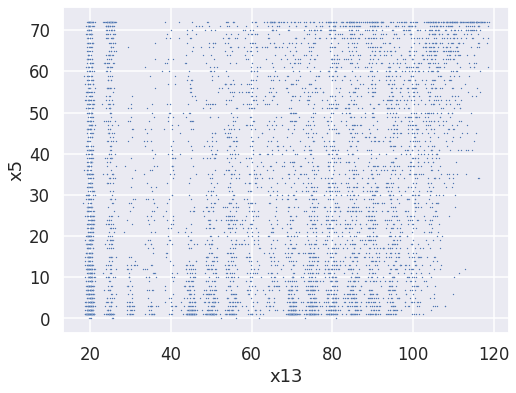

In [ ]:
sns.scatterplot(data=df,x='x13',y='x5',s=2);

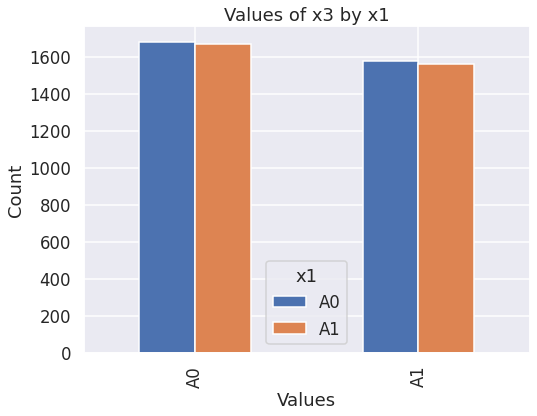

In [ ]:
pd.crosstab(df['x3'],df['x1']).plot.bar()
plt.title("Values of x3 by x1")
plt.xlabel("Values")
plt.ylabel("Count");

The motive behind this graph was to see if there are same amount of 'A0' and 'A1' in the variables 'x1' and 'x3'.

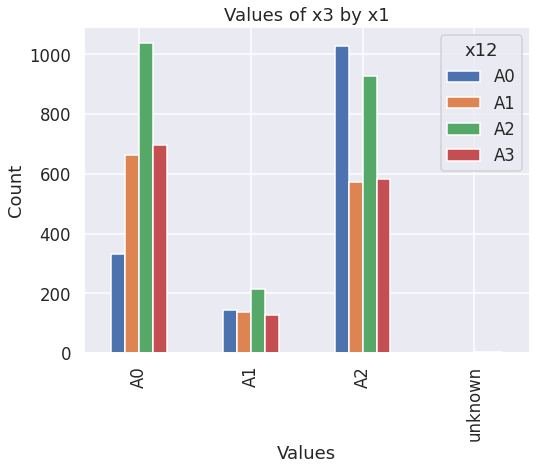

In [ ]:
pd.crosstab(df['x6'],df['x12']).plot.bar()
plt.title("Values of x3 by x1")
plt.xlabel("Values")
plt.ylabel("Count");

## Data Preprocessing and Cleaning

Here, I am aiming to check for all types of bad data, that is missing values, NaN, etc.

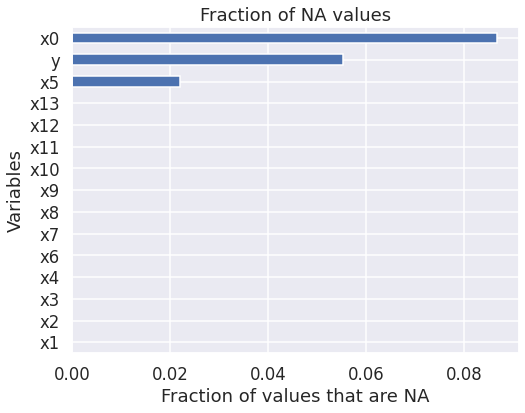

In [ ]:
df.isna().mean().sort_values().plot.barh()
plt.title("Fraction of NA values")
plt.xlabel("Fraction of values that are NA")
plt.ylabel("Variables");

Here, I see that my target variable 'y' has 6 % of NA values, which I plan to drop as it is my target variable, and I cannot impute them and and this is the only way to deal with 

In [ ]:
df1 = df[-df['y'].isna()]

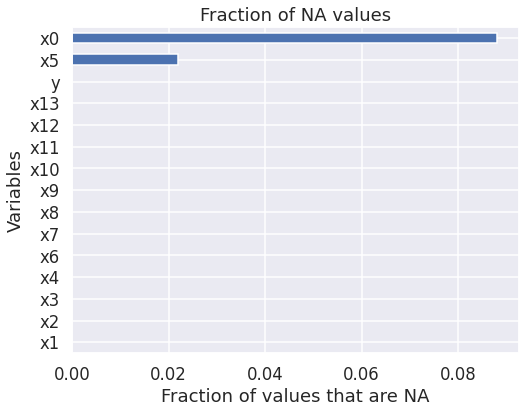

In [ ]:
df1.isna().mean().sort_values().plot.barh()
plt.title("Fraction of NA values")
plt.xlabel("Fraction of values that are NA")
plt.ylabel("Variables");

Now that I have eliminated all the NA values from my target variable 'y', I will focus on dealing with the of NA values of variable x0 and x5.

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.isna().sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
y      0
dtype: int64

### Bad Data

Checking for empty strings.

In [ ]:
(df1.select_dtypes(include='object') == "").sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
y      0
dtype: int64

Checking for zero values.

In [ ]:
(df1 == 0).sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     9
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
y      0
dtype: int64

## Data Visualisation

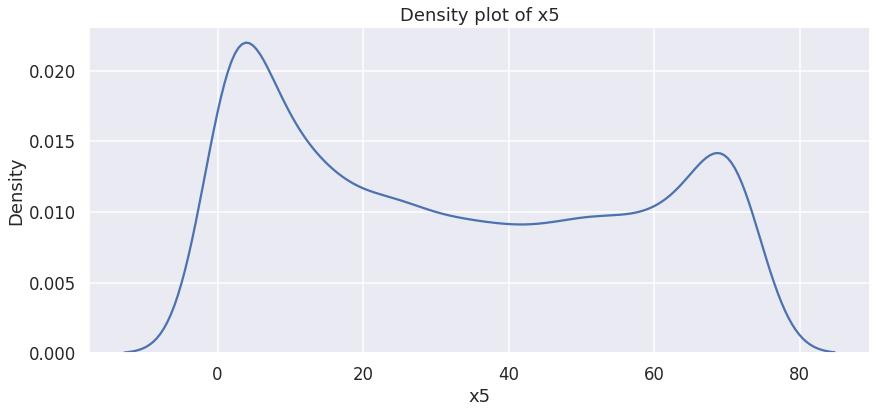

In [ ]:
plt.figure(figsize=(14,6))
sns.kdeplot(df['x5'], data=df1)
plt.title("Density plot of x5");

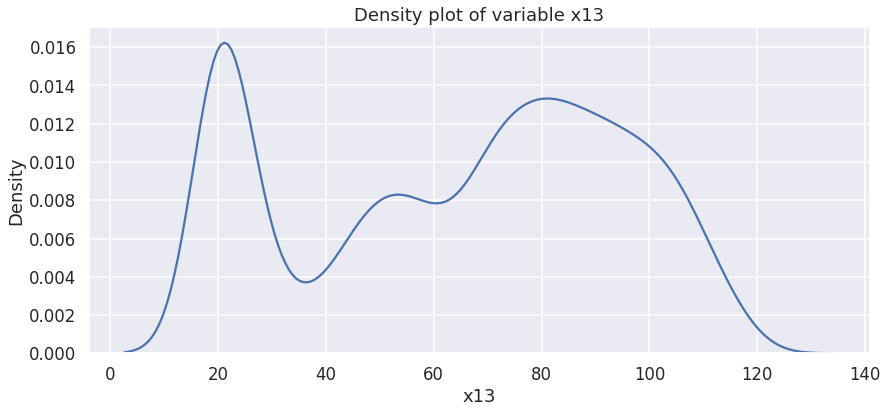

In [ ]:
plt.figure(figsize=(14,6))
sns.kdeplot(df['x13'], data=df1)
plt.title("Density plot of variable x13");

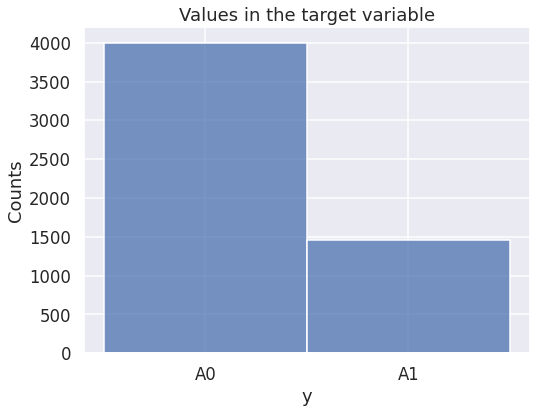

In [ ]:
sns.histplot(df1['y'])
plt.xlabel('y')
plt.ylabel('Counts')
plt.title('Values in the target variable');

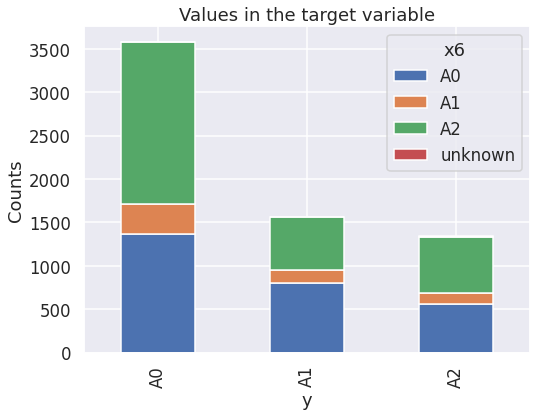

In [ ]:
pd.crosstab(df['x11'],df['x6']).plot.bar(stacked=True)
plt.xlabel('y')
plt.ylabel('Counts')
plt.title('Values in the target variable');

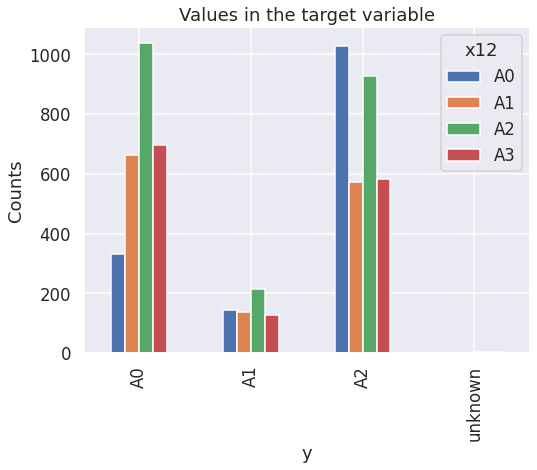

In [ ]:
pd.crosstab(df['x6'],df['x12']).plot.bar()
plt.xlabel('y')
plt.ylabel('Counts')
plt.title('Values in the target variable');

From all the graphs, I see that there is a some relation between the varaibles.

## Machine Learning


As the target variable here is categorical, it is classification problem.

I will be using Naive Bayes and Decision tree models as my classification model.

### Naive Bayes Classfication

In [ ]:
target = 'y'
predictors = list(df1.columns)
predictors.remove(target)

X = df1[predictors].values
y = df1[target].values

In this section, I use ordinal encoding to convert the categorical predectors to numeric predictors.

In [ ]:
encoder = OrdinalEncoder()
X1 = encoder.fit_transform(X)
print(X1)

[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 8.600e+02]
 [1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 1.025e+03]
 [9.380e+02 0.000e+00 0.000e+00 ... 1.000e+00 2.000e+00 1.208e+03]
 ...
 [5.131e+03 0.000e+00 1.000e+00 ... 0.000e+00 3.000e+00 6.150e+02]
 [5.133e+03 0.000e+00 0.000e+00 ... 1.000e+00 1.000e+00 1.010e+02]
 [5.134e+03 0.000e+00 0.000e+00 ... 1.000e+00 3.000e+00 2.630e+02]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30,random_state=42)

In [ ]:
baseline_accuracy = (y_train=='A0').mean()
print('Baseline accuracy: {:.3f}'.format(baseline_accuracy))

Baseline accuracy: 0.731


The baseline accuracy is approximately 73%.

In [ ]:
model = CategoricalNB()
clf = model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7344322344322345

The test accuracy is also 73%, which mean the model is not that great.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          A0       0.91      0.71      0.80      1208
          A1       0.50      0.79      0.61       430

    accuracy                           0.73      1638
   macro avg       0.70      0.75      0.70      1638
weighted avg       0.80      0.73      0.75      1638



Here, I see that the my f1-score of majority class A0 is greater than accuracy by almost 7 percent. 

So I will be using oversampling here to improve the accuracy.

In [ ]:
majority_rows = df1[df1['y'] == 'A0']
majority_count = majority_rows.shape[0]
minority_rows = df1[df1['y'] == 'A1'].sample(majority_count,replace=True)

df1_balanced = pd.concat([majority_rows, minority_rows])
df1_balanced = df1_balanced.sample(frac=1).reset_index(drop=True)

Now, I repeat the steps steps similar steps again to check if oversampling the minority class helped improving the model.

In [ ]:
X = df1_balanced[predictors].values
y = df1_balanced[target].values

In [ ]:
encoder = OrdinalEncoder()
X1 = encoder.fit_transform(X)
print(X1)

[[3.892e+03 0.000e+00 0.000e+00 ... 0.000e+00 2.000e+00 3.720e+02]
 [2.285e+03 1.000e+00 0.000e+00 ... 1.000e+00 3.000e+00 2.040e+02]
 [7.760e+02 0.000e+00 0.000e+00 ... 1.000e+00 2.000e+00 1.196e+03]
 ...
 [4.133e+03 1.000e+00 1.000e+00 ... 0.000e+00 2.000e+00 8.230e+02]
 [6.590e+02 0.000e+00 0.000e+00 ... 0.000e+00 2.000e+00 4.680e+02]
 [4.710e+02 0.000e+00 0.000e+00 ... 2.000e+00 1.000e+00 6.810e+02]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30,random_state=42)

In [ ]:
model = CategoricalNB()
clf = model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.793002915451895

As a result of oversampling, I see that the test accuracy has increased significantly by approximately 6 %, making it a better model.

### Decision Trees Classification

Here, I change the values of my target variable from A0 and A1 to 0 and 1 respectively.

In [ ]:
def change(s):
  if(s=='A0'):
    return 0
  else:
    return 1

df1['y'].apply(change)

0       0
1       1
2       0
3       0
4       0
       ..
6474    1
6477    1
6478    1
6480    0
6481    0
Name: y, Length: 5460, dtype: int64

In this section, I use nominal encoding.

In [ ]:
df1 = pd.get_dummies(df1.drop('x0',axis=1), drop_first=True)

In [ ]:
target = 'y_A1'
predictors = list(df1.columns)
predictors.remove(target)

X = df1[predictors].values
y = df1[target].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
(accuracy_score(y_test, y_pred))

0.782051282051282

I get an accuracy of 78% without changing or tweaking any parameters.

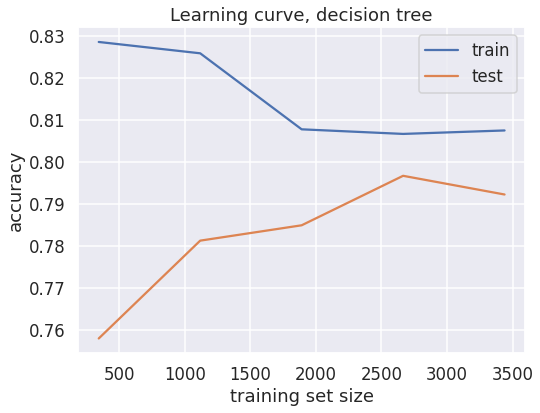

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10,scoring='accuracy') 
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='train') 
plt.plot(train_sizes, test_scores_mean, label='test') 
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.title('Learning curve, decision tree')
plt.legend();

From this learning curve, I understand that my model is going in a state of overfitting.

Now, I want to check that will my model perform better with a balanced target variable.

In [ ]:
df1_balanced['y'].apply(change)

0       1
1       0
2       0
3       1
4       1
       ..
7997    1
7998    1
7999    1
8000    1
8001    0
Name: y, Length: 8002, dtype: int64

In [ ]:
df1_balanced = pd.get_dummies(df1_balanced.drop('x0',axis=1), drop_first=True)
df1_balanced.head()

,x5,x13,x1_A1,x2_A1,x3_A1,x4_A1,x6_A1,x6_A2,x6_unknown,x7_A1,x7_A2,x8_A1,x8_A2,x9_A1,x9_A2,x10_A1,x10_A2,x11_A1,x11_A2,x12_A1,x12_A2,x12_A3,y_A1
0,4.0,50.9,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1,60.0,37.7,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,71.0,99.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
3,6.0,89.3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
4,2.0,79.6,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [ ]:
target = 'y_A1'
predictors = list(df1_balanced.columns)
predictors.remove(target)

X = df1_balanced[predictors].values
y = df1_balanced[target].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
(accuracy_score(y_test, y_pred))

0.738442315701791

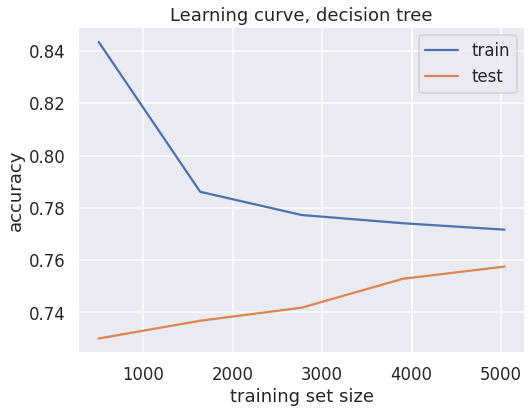

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10,scoring='accuracy') 
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='train') 
plt.plot(train_sizes, test_scores_mean, label='test') 
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.title('Learning curve, decision tree')
plt.legend();

I see that even though my accuracy is less than before, my learning curve is improved and it is a better model.

Now, I want to search for the best hyperparameters for the model, to get best model.

In [ ]:
param_dict = {
    "max_depth":range(2,8),
    "min_samples_leaf":range(10,50,10),
    "max_features":['auto',None]
}
tree_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_dict, cv=10, scoring="accuracy")
tree_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 8),
                         'max_features': ['auto', None],
                         'min_samples_leaf': range(10, 50, 10)},
             scoring='accuracy')

In [ ]:
print(tree_cv.best_params_)

{'max_depth': 7, 'max_features': None, 'min_samples_leaf': 10}


In [ ]:
print("Top accuracy from grid search:",tree_cv.best_score_.round(3))

Top accuracy from grid search: 0.773


In [ ]:
def plot_learning_curve(clf, X_train, y_train):
    train_sizes, train_scores, test_scores = \
    learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label='train')
    plt.plot(train_sizes, test_scores_mean, label='test')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning curve, classification tree')
    plt.legend();

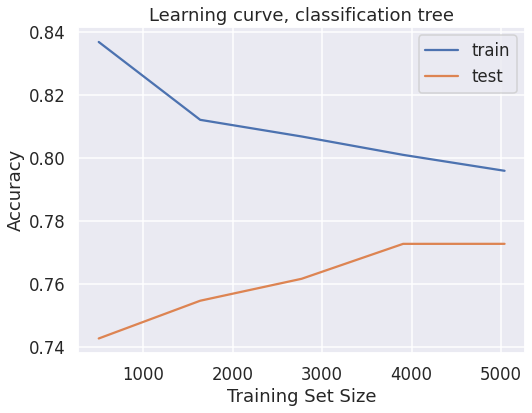

In [ ]:
plot_learning_curve(tree_cv.best_estimator_,X_train,y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [ ]:
def plot_learning_curve(clf, X_train, y_train):
    train_sizes, train_scores, test_scores = \
    learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label='train')
    plt.plot(train_sizes, test_scores_mean, label='test')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning curve, classification tree')
    plt.legend();

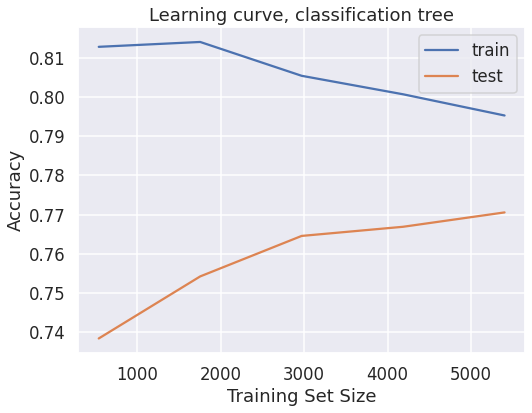

In [ ]:
plot_learning_curve(tree_cv.best_estimator_,X_train,y_train)

So after using the best hyperparameters and and giving more training data to the model, it performs better than earlier and also the accuracy is increasing significantly.

Now, I want to check whether limiting the features would help my model get better?

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
def plot_tree_custom(clf):
    target_names = ['0','1']
    dot_data = export_graphviz(clf, precision=2,
                         feature_names=predictors,  
                         proportion=True,
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

    graph = graphviz.Source(dot_data)  
    return graph


In [ ]:
plot_tree_custom(tree_cv.best_estimator_);

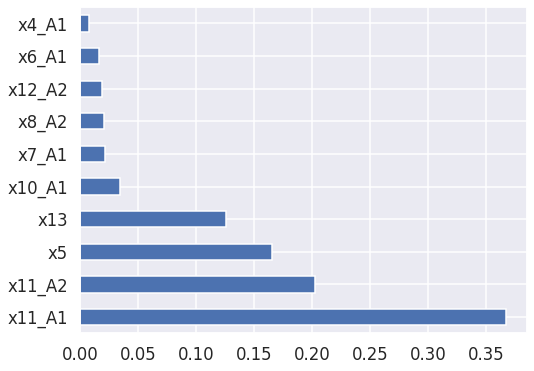

In [ ]:
pd.Series(tree_cv.best_estimator_.feature_importances_, index=predictors).sort_values(ascending=False)[:10].plot.barh();

In [ ]:
def forward_selection_classif(clf, X, y, threshold=None, num_folds=5):
    remaining = list(range(X.shape[1]))
    selected = []
    accuracies = []
    previous_best = 0.0
    while len(remaining) > 0:
        best_i, best_accuracy = 0, 0.0
        for i in remaining:
            accuracy = cross_val_score(clf, X[:,selected+[i]], y, cv=num_folds).mean()
            if accuracy > best_accuracy:
                best_i, best_accuracy = i, accuracy
                
        if (threshold is not None) and (best_accuracy - previous_best) < threshold:
            break
        selected.append(best_i)
        accuracies.append(best_accuracy)
        remaining.remove(best_i)
        previous_best = best_accuracy
    
    
    return np.array(selected), accuracies

In [ ]:
def plot_selected(selected, accuracies, predictors):
    pd.Series(accuracies, index=predictors[selected]).plot.barh()
    plt.xlim(0.5, 1.0)
    plt.xlabel('Cross-validation accuracy')
    plt.title('Result of forward feature selection')

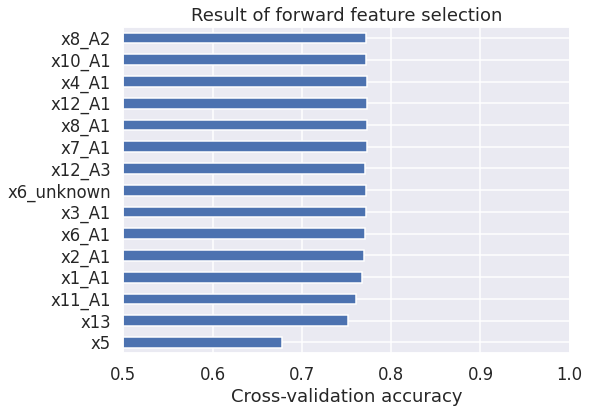

In [ ]:
selected, accuracies = forward_selection_classif(tree_cv.best_estimator_, X_train, y_train, num_folds=10)
plot_selected(selected[:15], accuracies[:15], np.array(predictors))

In [ ]:
predictors = ['x11_A1','x11_A2','x5','x13']
target = 'y_A1'

X = df1_balanced[predictors].values
y = df1_balanced[target].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

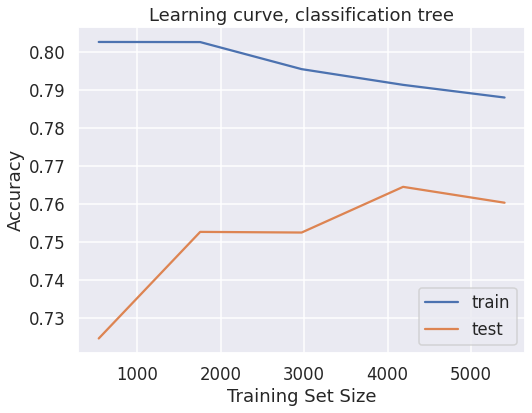

In [ ]:
plot_learning_curve(tree_cv.best_estimator_,X_train,y_train)

In [ ]:
print(np.array(accuracies[:15]).mean().round(4))

0.7632


In conclusion, limit the features doesn't get better result but oversampling the minority class does.

# Conclusion

### In this project, we used 2 ML algorithms to predict our target variable 'y'. I found that data imbalance was a major issue and oversamplin the minority class help to get a better model and had significant change in the accuracy as well.